In [2]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

# 1.数据准备

In [3]:
path = './1121+1117混合数据/'

In [4]:
Categories = os.listdir(path)
Categories

['可乐_1121',
 '姜_1121',
 '柚子_1121',
 '柠檬_1121',
 '橙汁+苹果汁_1121',
 '洋葱_1121',
 '热咖啡_1121',
 '白酒_1117',
 '白醋_1117',
 '空_1121',
 '芒果_1121',
 '蒜_1121',
 '酱油_1117']

In [5]:
#全部传感器
S_list = ["S"+str(i+1) for i in range(19)]

#选择响应值明显的传感器
S_selected_list=['S1','S2','S3','S4','S5','S6','S7','S8','S15','S16','S17','S18']

## 1.1数据清洗

In [5]:
for c in Categories:
    idx_list = os.listdir(os.path.join(path,c))
    
    for idx in idx_list:
        df = pd.read_csv(os.path.join(path,c,idx))
        for s in S_list:
            df[s] = df[s].fillna('999')
            df = df.drop(df[df[s]=='999'].index.tolist())
            df.to_csv(os.path.join(path,c,idx), index=False)

## 1.2进样点选取

In [5]:
def get_knee_point(df):
    S_knee_list=['S1','S5','S6','S18'] #进样点选取传感器
    knee_points=[]
    for s in S_knee_list:
        df_new=df[s]-df[s].shift(2)
        df_list=df_new[df_new>0.015].index.tolist()
        if len(df_list)==0:
            knee_points.append(4)
        else:
            knee_points.append(df_list[0]-1)
            
    counts = np.bincount(knee_points)
    knee_point=np.argmax(counts)
    
    return knee_point

# 2.模型训练

## 2.1差值建模
选择筛选后的传感器，拐点后5S内最大值与基线做差，作为数据

#### 计算响应值

In [15]:
is_first=1

for c in Categories:
    idx_list = os.listdir(os.path.join(path, c))
    label = c.split('_')[0]
    '''
    if label=='空':
        label=0
    elif label =="白酒":
        label=1
    elif label =="白醋":
        label = 2
    elif label =="酱油":
        label = 3
    elif label =="白酒+酱油":
        label = 4
    elif label =='白酒+白醋':
        label = 5
    elif label == "酱油+白醋":
        label = 6
    elif label =="白醋+酱油+白酒":
        label = 7
    '''     
    for idx in idx_list:
        print(idx)
        idx_name=idx.split('.csv')[0]
        
        df = pd.read_csv(path+c+'./'+idx,nrows=60)
        
        score = pd.DataFrame(columns=S_selected_list+['label'], index=[idx_name])
        
        knee_point = get_knee_point(df)
        
        #for s in S_selected_list:
        for s in S_selected_list:
            s_max = df[s][knee_point:knee_point+11].max()
            s_min = df[s][knee_point]

            score[s][idx_name] = s_max - s_min
        
        score['label'][idx_name] = label
        if is_first ==1:
            ######改名字
            score.to_csv('./score/CyberDog1121.csv',header=True, index=True, mode='a',encoding='utf-8-sig')
            is_first=0
        else:
            score.to_csv('./score/CyberDog1121.csv',header=False, index=True, mode='a',encoding='utf-8-sig')

可乐_112111.21.160722.csv
可乐_112111.21.160943.csv
可乐_112111.21.161151.csv
可乐_112111.21.161533.csv
可乐_112111.21.161712.csv
可乐_112111.21.161859.csv
可乐_112111.21.162034.csv
可乐_112111.21.162212.csv
可乐_112111.21.162347.csv
可乐_112111.21.162527.csv
姜_112111.21.150428.csv
姜_112111.21.150843.csv
姜_112111.21.151019.csv
姜_112111.21.151225.csv
姜_112111.21.151510.csv
姜_112111.21.151646.csv
姜_112111.21.151826.csv
姜_112111.21.152000.csv
姜_112111.21.152135.csv
姜_112111.21.152313.csv
柚子_112111.21.142443.csv
柚子_112111.21.142617.csv
柚子_112111.21.142904.csv
柚子_112111.21.143009.csv
柚子_112111.21.143114.csv
柚子_112111.21.143233.csv
柚子_112111.21.143339.csv
柚子_112111.21.143445.csv
柚子_112111.21.143555.csv
柚子_112111.21.143718.csv
柠檬_112111.21.154629.csv
柠檬_112111.21.154807.csv
柠檬_112111.21.154943.csv
柠檬_112111.21.155120.csv
柠檬_112111.21.155254.csv
柠檬_112111.21.155431.csv
柠檬_112111.21.155611.csv
柠檬_112111.21.155751.csv
柠檬_112111.21.155926.csv
柠檬_112111.21.160100.csv
橙汁+苹果汁_112111.21.113907.csv
橙汁+苹果汁_112111.21.11394

In [9]:
from matplotlib.pyplot import MultipleLocator

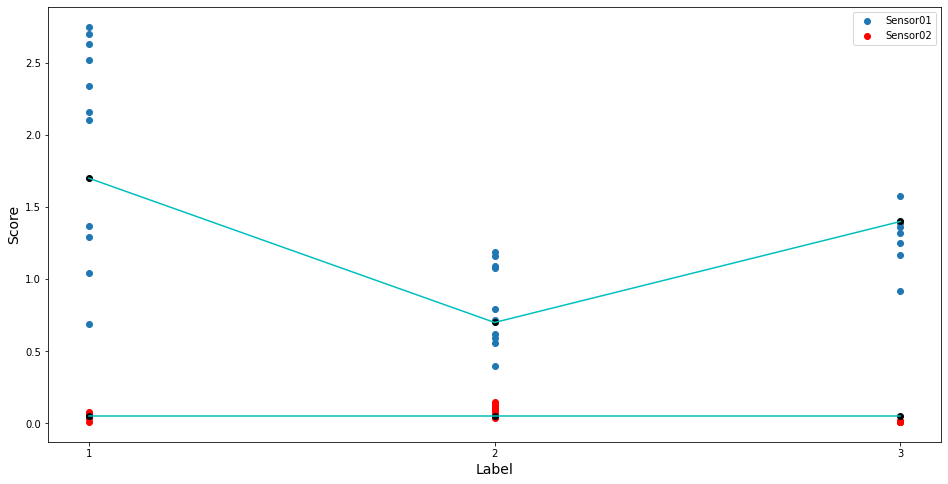

In [36]:
plt.figure(figsize=(16,8))

plt.scatter(df['label'].tolist(), df['S5'].tolist(),label='Sensor01')
plt.scatter(df['label'].tolist(),df['S10'].tolist(),c='red', label='Sensor02')
x_major_locator=MultipleLocator(1)
ax=plt.gca()
ax.xaxis.set_major_locator(x_major_locator)

x = [[1, 2, 3],[1,2,3]] # 要连接的两个点的坐标,
y = [[1.7, 0.7, 1.4],[0.05,0.05,0.05]]

for i in range(len(x)):

    plt.plot(x[i], y[i], color='c')
    plt.scatter(x[i], y[i], color='k')

plt.xlabel('Label',fontsize=14)
plt.ylabel('Score',fontsize=14)

plt.legend()
plt.show()

#### 建模

In [6]:
score = pd.read_csv('./Score/CyberDog1121.csv')
score

,Unnamed: 0,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18,label
0,可乐_112111.21.160722,0.12,0.01,0.03,0.06,0.10,0.05,0.12,0.02,0.01,0.02,0.01,0.05,可乐
1,可乐_112111.21.160943,0.10,0.01,0.02,0.04,0.07,0.04,0.09,0.01,0.01,0.02,0.01,0.04,可乐
2,可乐_112111.21.161151,0.15,0.01,0.03,0.06,0.11,0.06,0.13,0.01,0.01,0.02,0.01,0.06,可乐
3,可乐_112111.21.161533,0.09,0.01,0.02,0.04,0.07,0.04,0.09,0.01,0.01,0.01,0.00,0.03,可乐
4,可乐_112111.21.161712,0.06,0.00,0.01,0.04,0.06,0.03,0.07,0.00,0.00,0.00,0.01,0.04,可乐
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,酱油_111711.17.152657,0.06,0.01,0.04,0.05,0.83,0.36,0.05,0.05,0.17,0.01,0.00,0.43,酱油
118,酱油_111711.17.152943,0.08,0.01,0.05,0.06,0.91,0.39,0.07,0.06,0.22,0.02,0.01,0.44,酱油
119,酱油_111711.17.153056,0.08,0.01,0.04,0.05,0.88,0.37,0.07,0.06,0.22,0.02,0.01,0.43,酱油
120,酱油_111711.17.153213,0.15,0.02,0.09,0.11,1.45,0.68,0.12,0.10,0.43,0.05,0.02,0.73,酱油


<AxesSubplot:>

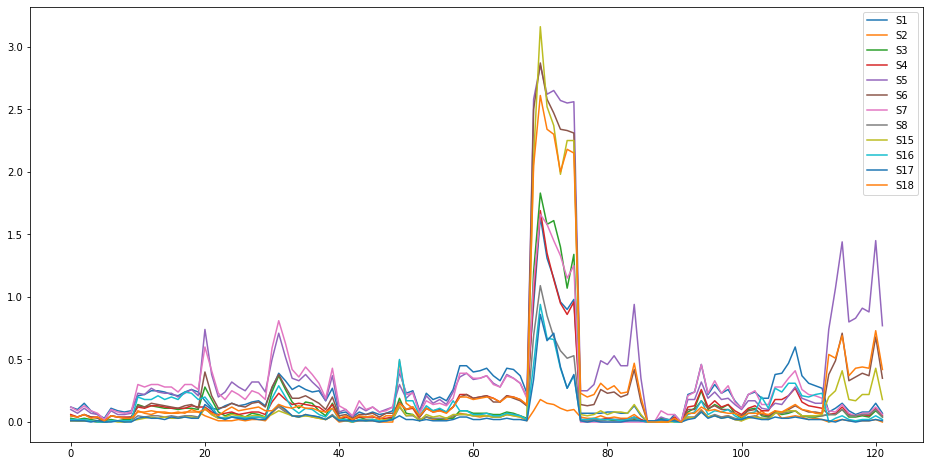

In [7]:
score.iloc[:,1:13].plot(figsize=(16,8))


In [37]:
x=score[S_selected_list]
y=score['label']

x=np.array(x).tolist()
y=np.array(y).tolist()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #80%和20%划分X和y

## svm

In [20]:
from sklearn import svm  
clf = svm.SVC(kernel = 'linear') #SVM模块

In [21]:
clf.fit(x_train, y_train)
#计算svc分类器的准确率
print("训练集：",clf.score(x_train,y_train))
print("测试集：",clf.score(x_test,y_test))

训练集： 0.4329896907216495
测试集： 0.16


## 决策树

In [10]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_blobs
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [15]:
from sklearn.metrics import confusion_matrix

In [25]:
clf1 = DecisionTreeClassifier(max_depth=None, min_samples_split=2,random_state=0)
clf1.fit(x_train, y_train)
print("训练集：",clf1.score(x_train,y_train))
print("测试集：",clf1.score(x_test,y_test))


训练集： 1.0
测试集： 0.76


## 随机森林

In [29]:
clf2 = RandomForestClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf2.fit(x_train, y_train)
print("训练集：",clf2.score(x_train,y_train))
print("测试集：",clf2.score(x_test,y_test))


训练集： 0.9896907216494846
测试集： 0.92


## ExtraTree

In [38]:
clf3 = ExtraTreesClassifier(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
clf3.fit(x_train, y_train)
print("训练集：",clf3.score(x_train,y_train))
print("测试集：",clf3.score(x_test,y_test))


训练集： 1.0
测试集： 0.72


In [ ]:
clf3_weight=clf3.feature_importances_

In [66]:
df_weight=pd.DataFrame(columns=S_list, index=['Weight'])
for i in range(len(clf3_weight)):
    df_weight[S_selected_list[i]]['Weight']=clf3_weight[i]
df_weight=df_weight.fillna(0)
df_weight.T.to_csv('Weight.csv')
df_weight

D:\Anaconda\envs\ds\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,S1,S2,S3,S4,S5,S6,S7,S8,S9,S10,S11,S12,S13,S14,S15,S16,S17,S18,S19
Weight,0.078551,0.052673,0.06368,0.081762,0.097749,0.098517,0.099794,0.060962,0,0,0,0,0,0,0.093424,0.113425,0.047582,0.11188,0


In [27]:
#保存模型
savemodel=pickle.dumps(clf3)
f=open('ExtraTree1121.model', "wb+")
f.write(savemodel)
f.close()

In [40]:
for i in range(122):
    print(clf3.predict([score[S_selected_list].iloc[i].tolist()]))
    y_pred.append(clf3.predict([score[S_selected_list].iloc[i].tolist()])[0])

['芒果']
['可乐']
['可乐']
['可乐']
['可乐']
['可乐']
['可乐']
['可乐']
['可乐']
['可乐']
['姜']
['姜']
['姜']
['姜']
['姜']
['姜']
['姜']
['姜']
['姜']
['姜']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柚子']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['柠檬']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['橙汁+苹果汁']
['洋葱']
['蒜']
['洋葱']
['洋葱']
['洋葱']
['洋葱']
['洋葱']
['洋葱']
['洋葱']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['热咖啡']
['白酒']
['白酒']
['白酒']
['白酒']
['白酒']
['白酒']
['白酒']
['白醋']
['白醋']
['白醋']
['白醋']
['白醋']
['白醋']
['白醋']
['白醋']
['酱油']
['白醋']
['空']
['空']
['空']
['空']
['空']
['空']
['芒果']
['芒果']
['芒果']
['芒果']
['芒果']
['芒果']
['芒果']
['柠檬']
['芒果']
['芒果']
['芒果']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['蒜']
['酱油']
['酱油']
['酱油']
['酱油']
['酱油']
['酱油']
['酱油']
['酱油']
['酱油']


In [42]:
y_true = score['label'].tolist()

In [44]:
labels = list(set(y_true))
labels

['柠檬',
 '橙汁+苹果汁',
 '空',
 '可乐',
 '洋葱',
 '芒果',
 '蒜',
 '酱油',
 '白醋',
 '柚子',
 '热咖啡',
 '姜',
 '白酒']

In [45]:
confusion_matrix(y_true, y_pred, labels=labels)

array([[10,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  9,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  6,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  9,  0,  1,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  8,  0,  1,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 10,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  9,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  1,  9,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 11,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  7]], dtype=int64)

## 2.2差值归一化建模
选择筛选后的传感器，拐点后5S内最大值与基线做差，之后对其归一化作为数据

#### min-max归一化（Min-Max Normalization）

In [253]:
data_score = score.iloc[:,1:13]
data_score

,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18
0,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
2,0.03,0.00,0.02,0.01,0.02,0.01,0.02,0.00,0.01,0.00,0.02,0.01
3,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.01
4,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01
8,0.03,0.01,0.01,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.02
9,0.04,0.01,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.00,0.01,0.02


In [255]:
data_score_norm = (data_score - data_score.min()) / (data_score.max() - data_score.min())
data_score_norm

,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18
0,0.002817,0.000000,0.000000,0.000000,0.000000,0.000000,0.002591,0.000000,0.000000,0.000000,0.003597,0.003448
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003448
2,0.008451,0.000000,0.006873,0.003311,0.006689,0.003021,0.005181,0.000000,0.002320,0.000000,0.007194,0.003448
3,0.005634,0.010753,0.003436,0.006623,0.006689,0.003021,0.002591,0.002874,0.000000,0.000000,0.003597,0.003448
4,0.008451,0.010753,0.003436,0.003311,0.003344,0.003021,0.002591,0.000000,0.000000,0.000000,0.003597,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002591,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.003311,0.000000,0.000000,0.002591,0.000000,0.002320,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.003021,0.000000,0.000000,0.000000,0.000000,0.000000,0.003448
8,0.008451,0.010753,0.003436,0.006623,0.006689,0.003021,0.002591,0.000000,0.000000,0.000000,0.000000,0.006897
9,0.011268,0.010753,0.006873,0.006623,0.006689,0.003021,0.005181,0.002874,0.000000,0.000000,0.003597,0.006897


<AxesSubplot:>

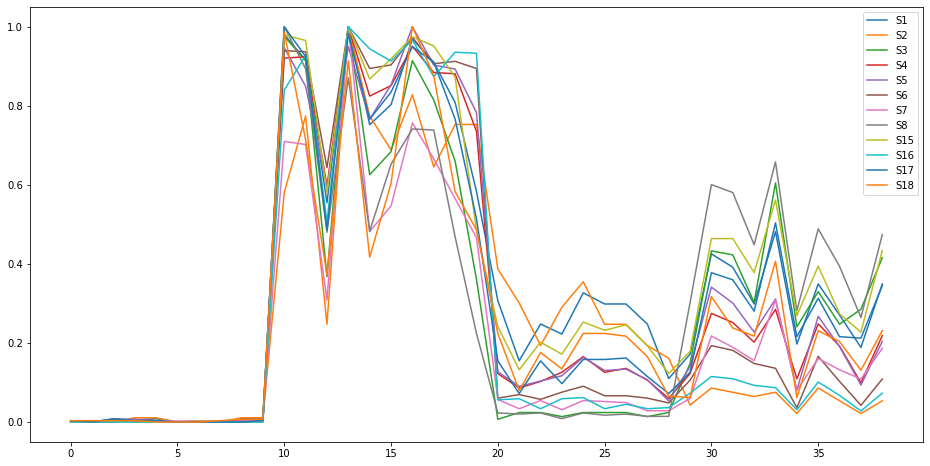

In [256]:
data_score_norm.plot(figsize=(16,8))

In [257]:
x=data_score_norm
y=score['label']

x=np.array(x).tolist()
y=np.array(y).tolist()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #80%和20%划分X和y

In [258]:
from sklearn import svm  
clf2 = svm.SVC(kernel = 'linear') #SVM模块
clf2.fit(x_train, y_train)

#计算svc分类器的准确率
print("训练集：",clf2.score(x_train,y_train))
print("测试集：",clf2.score(x_test,y_test))

训练集： 0.967741935483871
测试集： 1.0


In [259]:
#保存模型
svm=pickle.dumps(clf2)
f=open('svm1104GW.model', "wb+")
f.write(svm)
f.close()

In [260]:
for i in range(39):
    print(clf1.predict([score[S_selected_list].iloc[i].tolist()]))

[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[0]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[1]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[2]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]
[3]


## 2.3比值建模
选择筛选后的传感器，拐点后5S内最大值与基线做差，计算比例，作为数据，通过svm分类

In [261]:
data_score_ratio = data_score.copy()
data_score_ratio

,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18
0,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.01
1,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.01
2,0.03,0.00,0.02,0.01,0.02,0.01,0.02,0.00,0.01,0.00,0.02,0.01
3,0.02,0.01,0.01,0.02,0.02,0.01,0.01,0.01,0.00,0.00,0.01,0.01
4,0.03,0.01,0.01,0.01,0.01,0.01,0.01,0.00,0.00,0.00,0.01,0.00
5,0.00,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00
6,0.00,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.01,0.00,0.00,0.00
7,0.00,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,0.01
8,0.03,0.01,0.01,0.02,0.02,0.01,0.01,0.00,0.00,0.00,0.00,0.02
9,0.04,0.01,0.02,0.02,0.02,0.01,0.02,0.01,0.00,0.00,0.01,0.02


In [262]:
for i in range(len(data_score_ratio)):
    sum_score = data_score_ratio.iloc[i,:].sum()
    for s in S_selected_list:
        data_score_ratio[s][i]=data_score_ratio[s][i]/sum_score

In [263]:
data_score_ratio

,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18
0,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.250000,0.250000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
2,0.200000,0.000000,0.133333,0.066667,0.133333,0.066667,0.133333,0.000000,0.066667,0.000000,0.133333,0.066667
3,0.153846,0.076923,0.076923,0.153846,0.153846,0.076923,0.076923,0.076923,0.000000,0.000000,0.076923,0.076923
4,0.300000,0.100000,0.100000,0.100000,0.100000,0.100000,0.100000,0.000000,0.000000,0.000000,0.100000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.333333,0.000000,0.000000,0.333333,0.000000,0.333333,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000
8,0.230769,0.076923,0.076923,0.153846,0.153846,0.076923,0.076923,0.000000,0.000000,0.000000,0.000000,0.153846
9,0.222222,0.055556,0.111111,0.111111,0.111111,0.055556,0.111111,0.055556,0.000000,0.000000,0.055556,0.111111


<AxesSubplot:>

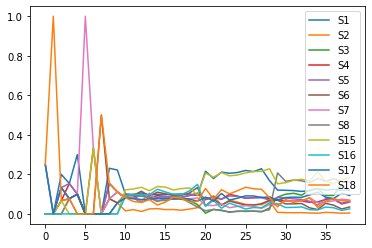

In [264]:
data_score_ratio.plot()

In [265]:
x=data_score_ratio
y=score['label']

x=np.array(x).tolist()
y=np.array(y).tolist()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #80%和20%划分X和y

In [266]:
from sklearn import svm  
clf3 = svm.SVC(kernel = 'linear') #SVM模块
clf3.fit(x_train, y_train)

#计算svc分类器的准确率
print("训练集：",clf3.score(x_train,y_train))
print("测试集：",clf3.score(x_test,y_test))

训练集： 0.3225806451612903
测试集： 0.125


In [46]:
#保存模型
svm=pickle.dumps(clf2)
f=open('svm1102R.model', "wb+")
f.write(svm)
f.close()

## 2.4比值归一建模
选择筛选后的传感器，拐点后5S内最大值与基线做差，计算比例，归一化后作为数据，通过svm分类

In [150]:
data_score_ratio_norm = (data_score_ratio - data_score_ratio.min()) / (data_score_ratio.max() - data_score_ratio.min())
data_score_ratio_norm

,S1,S2,S3,S4,S5,S6,S7,S8,S15,S16,S17,S18
0,0.548838,0.011193,0.565823,0.914094,0.264004,0.235859,0.303247,0.953544,0.808719,1.000000,0.733906,0.188662
1,0.486400,0.014427,0.684777,0.929051,0.205600,0.165546,0.315886,0.732956,0.905687,0.969964,0.782929,0.127719
2,0.516802,0.016384,0.758162,0.954646,0.157224,0.091591,0.338677,0.790899,0.990681,0.999496,0.825555,0.000000
3,0.349314,0.000000,0.523593,0.796384,0.280091,0.260288,0.412846,0.731152,0.886414,0.775684,0.505591,0.407299
4,0.405008,0.008471,0.646259,0.845672,0.176054,0.161233,0.381839,0.706187,0.917674,0.870027,0.692168,0.279850
5,0.432956,0.011287,0.706656,0.906944,0.174375,0.130106,0.385373,0.729050,0.980800,0.888441,0.723434,0.133600
6,0.437644,0.004962,0.609552,0.843929,0.214028,0.218086,0.341435,0.739736,0.819213,0.814577,0.687958,0.382709
7,0.391699,0.006776,0.626867,0.810699,0.214785,0.196791,0.374807,0.650790,0.849946,0.803584,0.682588,0.380129
8,0.470250,0.032628,1.000000,1.000000,0.000000,0.000000,0.208814,0.526206,1.000000,0.894804,1.000000,0.070745
9,0.401867,0.005079,0.624865,0.819246,0.189353,0.172203,0.386197,0.630492,0.868182,0.773096,0.643487,0.420225


<AxesSubplot:>

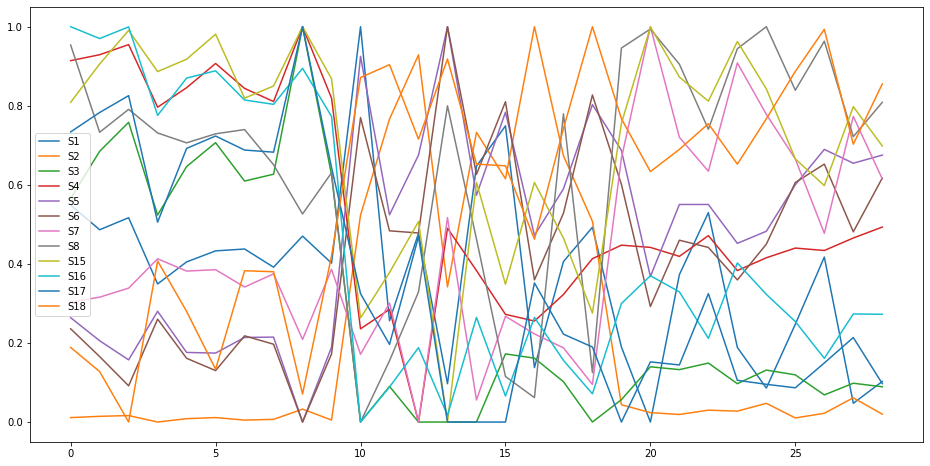

In [153]:
data_score_ratio_norm.plot(figsize=(16,8))

In [151]:
x=data_score_ratio_norm
y=score['label']

x=np.array(x).tolist()
y=np.array(y).tolist()

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2) #80%和20%划分X和y

In [152]:
from sklearn import svm  
clf4 = svm.SVC(kernel = 'linear') #SVM模块
clf4.fit(x_train, y_train)

#计算svc分类器的准确率
print("训练集：",clf4.score(x_train,y_train))
print("测试集：",clf4.score(x_test,y_test))

训练集： 1.0
测试集： 1.0
